# Hidden Unit Dynamic
**disclosure**: this is another solution different from Dong's answer, please feel free to choose whichever is more straightforward to you. Suppose we want to build a 4-2-4 auto encoder, and plot a dimond-shaped figure like this (the plot is provided on Ed)

As you may recall from the course content https://edstem.org/au/courses/9353/lessons/24462/slides/172844.

The dots in the plot refer to the weights from the input layer to the hidden layer, and the lines refer to the weights from the hidden layer to the output layer. Now, given the diagonal input and those weights, how do we decide the output?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.utils.data
import torch.nn.functional as F

In [2]:
#
x_input = np.eye(4)
#
print("x_input")
#
print("shape:", x_input.shape)
#
print(x_input)

x_input
shape: (4, 4)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


where each row represents a training sample $[x_1, x_2, x_3, x_4]$, and each column indicates an input dimension.

Recall that the hidden layer is computed as $h = sigmoid(xW_{xh}^T+b_h)$ where $W_{xh}$ is a 2x4 matrix

In [3]:
#
W_xh = np.random.rand(2, 4)
#
print("random weights")
#
print(W_xh)
#
h = np.dot(x_input, W_xh.T) # ignore activation and bias
#
print("hidden shape:", h.shape)
#
print(h)

random weights
[[0.08759392 0.61733432 0.06542886 0.51572793]
 [0.99334688 0.96737545 0.88956225 0.07659612]]
hidden shape: (4, 2)
[[0.08759392 0.99334688]
 [0.61733432 0.96737545]
 [0.06542886 0.88956225]
 [0.51572793 0.07659612]]


(hint) Feel free to try with different $W_{xh}$ values and see what weights are represnting.

Now that you know the co-ordinates of the points imply the weight of the matrix, we can manually define the $W_{xh}$

In [4]:
#
W_xh = np.array([[0.2, 0.8, 0.8, 0.2], [0.8, 0.8, 0.2, 0.2]])
#
print("W_xh:\n", W_xh)
#
h = np.dot(x_input, W_xh.T)
#
print("hidden layer:\n", h)  # the matrix represents the coordinates of [x1, x2, x3, x4]

W_xh:
 [[0.2 0.8 0.8 0.2]
 [0.8 0.8 0.2 0.2]]
hidden layer:
 [[0.2 0.8]
 [0.8 0.8]
 [0.8 0.2]
 [0.2 0.2]]


Recall that the output layer is computed as $y = sigmoid(hW_{hy}^T+b_y)$ where $W_{hy}$ is a 4x2 matrix

(If you are struggling with understanding why the weight $W_{hy}$ is represented by a line, think about this example:
let's set y = 0 and ignore activation function, then $y = hW_{hy}^T+b_y = 0$, in our case only two hidden units,  $h_1 W_{hy1} + h_2 W_{hy2} + b_y = 0$, $h_2 = (-b_y - h_1W_{hy1} )/ W_{hy2}$  that's a line function similar to $y = kx +b$ where $y = h_2$ and $x = h_1$ here.)

h1 shape (100,)
weight 1 0.544641349205771 weight 2: 1.4683334951535643 bias [0.19969382]
h2 shape (100,)


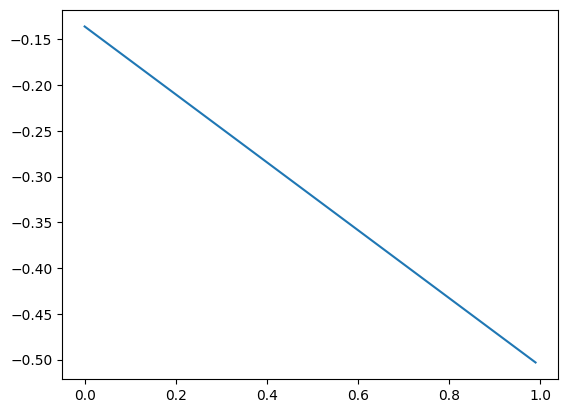

In [5]:
#
h1 = np.arange(0, 1, 0.01)
#
print("h1 shape", h1.shape)
#
W_hy = np.random.randn(2)
#
b_y=np.random.randn(1)
#
print("weight 1", W_hy[0], "weight 2:", W_hy[1], "bias",b_y)
#
h2 = (-b_y - h1*W_hy[0])/W_hy[1]
#
print("h2 shape", h2.shape)
#
plt.plot(h1, h2)
#
plt.show()

**(hint)** Feel free to try with different $W_{hy}$ values and see what weights are representing.

Now that you know the coefficients  of the line imply the weight of the matrix, we can manually define the $W_{hy}$

The functions of the four lines are:

L1: $h_1 - h_2 + 0.5 = 0$

L2: $-h_1 - h_2 +1.5 = 0$

L3: $h_1 - h_2 - 0.5 = 0$

L4: $-h_1 - h2 + 0.5 = 0$

and we know the relationship between the function and the weights are: $h_1 W_{hy1} + h_2 W_{hy2} + b_y = 0$,
which corresponds to the following weights and bias:

In [6]:
#
W_hy = np.array([[1,-1], [-1, -1], [1 , -1], [-1, -1]])
#
print('W_hy \n', W_hy)
#
b = np.array([0.5, 1.5, -0.5, 0.5])
#
print('bias', b)
#
y = np.dot(h, W_hy.T) + b
#
print("output", y)
#
print("shape", y.shape)

W_hy 
 [[ 1 -1]
 [-1 -1]
 [ 1 -1]
 [-1 -1]]
bias [ 0.5  1.5 -0.5  0.5]
output [[-0.1  0.5 -1.1 -0.5]
 [ 0.5 -0.1 -0.5 -1.1]
 [ 1.1  0.5  0.1 -0.5]
 [ 0.5  1.1 -0.5  0.1]]
shape (4, 4)


In [7]:
# post processing
def sigmoid(x):
    #
    return 1 / (1 + np.exp(-x))


#
y_sig = sigmoid(y)
#
y_sig = (y_sig > 0.5) * 1.0
#
print(y_sig)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 1.]]


# Putting everything together


In [8]:
#
def sigmoid(x):
    #
    return 1 / (1 + np.exp(-x))


#
def get_output():
    #
    x_input = np.eye(4)
    #
    W_xh = np.array([[0.2, 0.8, 0.8, 0.2], [0.8, 0.8, 0.2, 0.2]])
    #
    h = np.dot(x_input, W_xh.T)
    #
    W_hy = np.array([[1,-1], [-1, -1], [1 , -1], [-1, -1]])
    #
    b_y = np.array([0.5, 1.5, -0.5, 0.5])
    #
    y = 1.0 * (sigmoid(np.dot(h, W_hy.T) + b) > 0.5)
    return y


#
get_output()

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 0., 1.]])

# Validation

In [9]:
#
target = get_output()
#
target = torch.tensor(target, dtype=torch.float)
#
print(target)
#
num_in  = 4
#
num_out = 4
#
print(num_in, num_out)
# input is one-hot with same number of rows as target
input = torch.eye(num_in)
#
print(input)
#
xor_dataset = torch.utils.data.TensorDataset(input, target)
#
train_loader = torch.utils.data.DataLoader(xor_dataset, batch_size=num_in)

tensor([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 0., 1.]])
4 4
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


In [10]:
# encoder_model.py
# ZZEN9444, CSE, UNSW

class EncModel(torch.nn.Module):
    # fully connected two-layer network
    def __init__(self, num_input, num_hid, num_out):
        super(EncModel, self).__init__()
        #
        self.in_hid  = torch.nn.Linear(num_input, num_hid)
        #
        self.hid_out = torch.nn.Linear(num_hid, num_out)

    def forward(self, input):
        #
        hid_sum = self.in_hid(input)
        #
        hidden  = torch.tanh(hid_sum)
        #
        out_sum = self.hid_out(hidden)
        #
        output  = torch.sigmoid(out_sum)
        #
        return(output)


def plot_hidden(net):
    # plot the hidden unit dynamics of the network
    plt.xlim(-1, 1), plt.ylim(-1, 1) # limits of x and y axes
    # input to hidden weights and biases
    weight = net.in_hid.weight.data.cpu()
    #
    bias = net.in_hid.bias.data.cpu()
    #
    num_in = net.in_hid.weight.data.size()[1]
    #
    num_out = net.hid_out.weight.data.size()[0]
    # draw a dot to show where each input is mapped to in hidden unit space
    P = torch.tanh(weight + bias.unsqueeze(1).repeat(1, num_in))
    #
    plt.plot(P[0, :], P[1, :], 'bo')
    # draw a line interval to show the decision boundary of each output
    for i in range(num_out):
        #
        A = net.hid_out.weight.data.cpu()[i, 0]
        #
        B = net.hid_out.weight.data.cpu()[i, 1]
        #
        C = net.hid_out.bias.data.cpu()[i]

        j = 0
        #
        if A == 0:
            #
            if B != 0:
                #
                y0 = -C/B
                #
                if -1 < y0 < 1:
                    #
                    j = 2
                    #
                    plt.plot([-1, 1], [y0, y0])
        #
        elif B == 0:
            #
            if A != 0:
                #
                x0 = -C / A
                #
                if -1 < x0 < 1:
                    #
                    plt.plot([x0, x0], [-1, 1])
        #
        else:
            #
            x = torch.zeros(2)
            #
            y = torch.zeros(2)
            #
            y0 = (A - C) / B
            #
            if -1 <= y0 <= 1:
                #
                x[j] = -1
                #
                y[j] =  y0
                #
                j = j + 1
            #
            y0 = (-A - C) / B
            #
            if -1 <= y0 <= 1:
                #
                x[j] =  1
                #
                y[j] =  y0
                #
                j = j+1
            #
            x0 = (B-C)/A
            #
            if j < 2 and -1 <= x0 <= 1:
                #
                x[j] =  x0
                #
                y[j] = -1
                #
                j = j + 1
            #
            x0 = (-B - C) / A
            #
            if j < 2 and -1 <= x0 <= 1:
                #
                x[j] =  x0
                #
                y[j] =  1
                #
                j = j + 1
            #
            if j > 1:
                #
                plt.plot(x, y)

In [11]:
# create neural network according to model specification
# fix_me
device = 'cpu' #'cuda'
# device = 'cuda'
net = EncModel(num_in,2,num_out).to(device) # CPU or GPU

ep 10: loss =  0.5760
ep 20: loss =  0.5715
ep 30: loss =  0.5680
ep 40: loss =  0.5622
ep 50: loss =  0.5610
plot at epoch 50


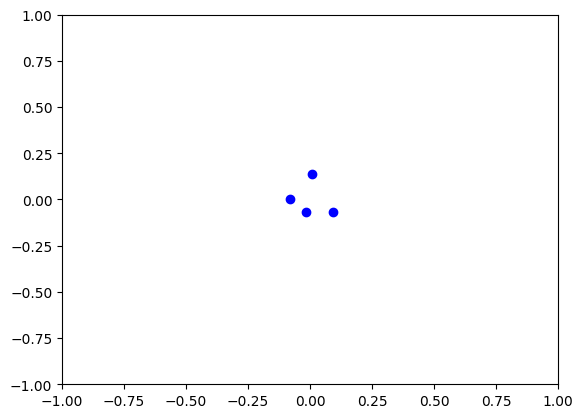

ep 60: loss =  0.5411
ep 70: loss =  0.4308
ep 80: loss =  0.2674
ep 90: loss =  0.1815
ep100: loss =  0.1284
plot at epoch 100


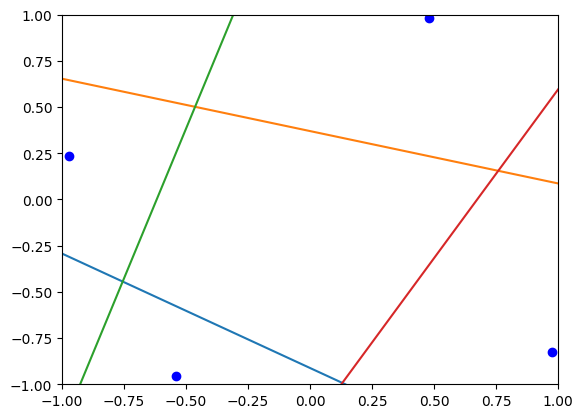

ep110: loss =  0.0933
ep120: loss =  0.0703
ep130: loss =  0.0556
ep140: loss =  0.0460
ep150: loss =  0.0393
plot at epoch 150


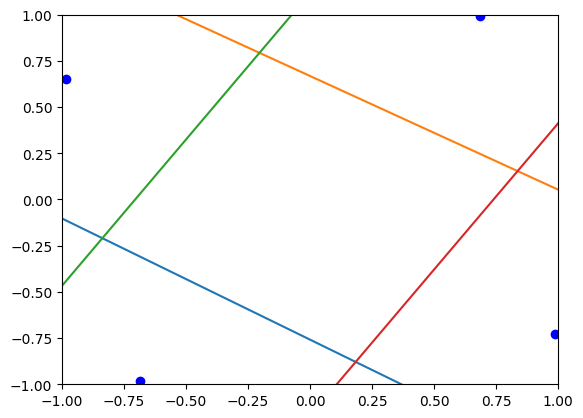

ep160: loss =  0.0343
ep170: loss =  0.0305
ep180: loss =  0.0274
ep190: loss =  0.0249
ep200: loss =  0.0228
plot at epoch 200


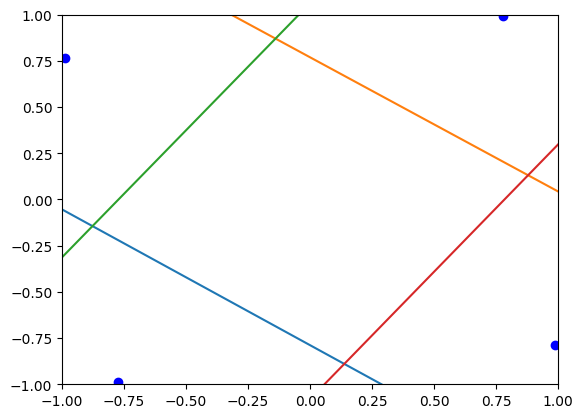

ep210: loss =  0.0210


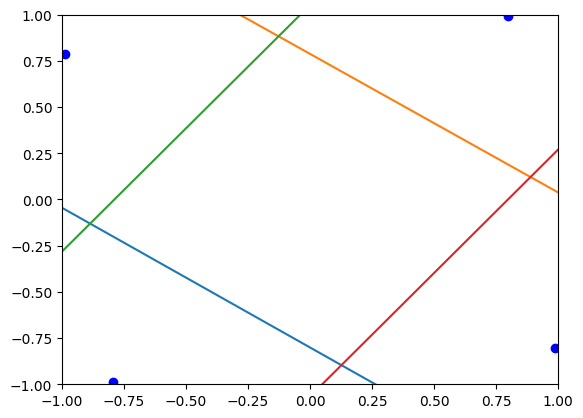

In [12]:
# initialize weights, but set biases to zero
net.in_hid.weight.data.normal_(0,1e-3)
#
net.hid_out.weight.data.normal_(0,1e-3)
#
net.in_hid.bias.data.zero_()
#
net.hid_out.bias.data.zero_()
# SGD optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.4, momentum=0.9)
# plot only at selected epochs
def plot_epoch(epoch):
    #
    return epoch in [50, 100, 150, 200, 300, 500, 700, 1000,
                     1500, 2000, 3000, 5000, 7000, 10000,
                     15000, 20000, 30000, 50000, 70000, 100000,
                     150000, 200000, 300000, 500000, 700000, 1000000]

loss = 1.0
epoch = 0
while epoch < int(1e6) and loss > 0.02:
    #
    epoch = epoch + 1
    #
    for batch_id, (data,target) in enumerate(train_loader):
        #
        data, target = data.to(device), target.to(device)
        #
        optimizer.zero_grad() # zero the gradients
        #
        output = net(data)    # apply network
        #
        loss = F.binary_cross_entropy(output,target)
        #
        loss.backward()       # compute gradients
        #
        optimizer.step()      # update weights
        #
        if epoch % 10 == 0:
            #
            print('ep%3d: loss = %7.4f' % (epoch, loss.item()))
        #
        if plot_epoch( epoch ):
            #
            print("plot at epoch", epoch)
            #
            plot_hidden(net)
            #
            plt.savefig('hiddnen_dynamic_%d.png'%epoch)
            #
            plt.show()
            #
            plt.clf()
#
plot_hidden(net)
#
plt.savefig('hiddnen_dynamic.png')
#
plt.show()